In [1]:
%pylab inline
from datetime import *
import scipy.stats as stats
from scipy.signal import *
from scipy.fftpack import fft

Populating the interactive namespace from numpy and matplotlib


In [2]:
arr1=genfromtxt("DeepCove_temperature.txt")  

In [3]:
arr2=genfromtxt("DiscoveryElementary_temperature.txt")  

In [4]:
arr3=genfromtxt("Helgesen_temperature.txt")  

In [5]:
arr4=genfromtxt("JamesBay_temperature.txt") 

In [6]:
arr5=genfromtxt("Keating_temperature.txt")  

In [7]:
arr6=genfromtxt("UVicSci_temperature.txt")  

In [8]:
arr7=genfromtxt("JohnMuir_temperature.txt")  

In [9]:
daymin=60*24
dayhr=24

In [10]:
Name=["DeepCove","DiscoveryElementary","Helgesen","JamesBay","Keating","UVicSci","JohnMuir"]
arr=[arr1,arr2,arr3,arr4,arr5,arr6,arr7]
x=[]
y=[]
x_1=[]
for i in range(len(arr)):
    x.append(linspace(2012,2017.67,arr[i][2]))
    y.append(arr[i][3:])
x=array(x)
y=array(y)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  import sys


In [11]:
from scipy.interpolate import interp1d
import pandas as pd

In [12]:
yi=[]
for i in range(len(arr)):
    arrn=arr[i][~numpy.isnan(arr[i])]
    tt=linspace(2012,2017.67,len(arrn)-3)
    f=interp1d(tt,arrn[3:],kind='linear')
    t=linspace(2012,2017.67,len(arr[i])-3)
    interp=f(t)
    yi.append(interp)
yi=array(yi)

In [18]:
for i in range(len(yi)):
    print ('the average temperature of "%s" interp  is: %s °C'%(Name[i],round(mean(yi[i]),2)))
    print ('the standard deviation of %s interp is :%s'%(Name[i],round(std(yi[i],ddof =1),2)))
    print ('')

the average temperature of "DeepCove" interp  is: 11.08 °C
the standard deviation of DeepCove interp is :6.27

the average temperature of "DiscoveryElementary" interp  is: 10.0 °C
the standard deviation of DiscoveryElementary interp is :7.47

the average temperature of "Helgesen" interp  is: 10.44 °C
the standard deviation of Helgesen interp is :5.76

the average temperature of "JamesBay" interp  is: 10.24 °C
the standard deviation of JamesBay interp is :4.58

the average temperature of "Keating" interp  is: 10.86 °C
the standard deviation of Keating interp is :6.1

the average temperature of "UVicSci" interp  is: 11.3 °C
the standard deviation of UVicSci interp is :5.61

the average temperature of "JohnMuir" interp  is: 10.46 °C
the standard deviation of JohnMuir interp is :4.93



In [19]:
from scipy import signal

In [20]:
tt_start = arr[0][0] -(7.0/24)  
day1start=date.toordinal(date(2016,6,1))+366 
day2start=date.toordinal(date(2016,9,1))+366
day3start=date.toordinal(date(2015,12,1))+366
day4start=date.toordinal(date(2016,3,1))+366
st=int(3+(day1start-tt_start)*daymin)  
en=int(3+(day2start-tt_start)*daymin) 
st1=int(3+(day3start-tt_start)*daymin)  
en1=int(3+(day4start-tt_start)*daymin) 

In [21]:
NFFT=2**14
fsamp=daymin
fnyq=fsamp/2.0
b, a = signal.ellip(5, 0.5, 40, 0.7/fnyq , 'high', analog=False)
c, d = signal.ellip(5, 0.5, 40, 1.4/fnyq , 'low', analog=False)

In [22]:
for i in range (len(arr)):
    data=yi[i][st:en]
    data1=yi[i][st1:en1]
    hfg_hanw,hff_hanw=mlab.psd(data, NFFT, Fs=fsamp, 
    window= window_hanning,noverlap=NFFT/2.0,sides='onesided')
    hfiltered=signal.filtfilt(b,a,data)
    filted=signal.filtfilt(c,d,hfiltered)
    hfg,hff=mlab.psd(filted,NFFT,Fs=fsamp,window=mlab.window_hanning,noverlap=NFFT/2.0)
    hfg_hanw,hff_hanw=mlab.psd(data, NFFT, Fs=fsamp, 
    window= window_hanning,noverlap=NFFT/2.0,sides='onesided')
    hfiltered1=signal.filtfilt(b,a,data1)
    filted1=signal.filtfilt(c,d,hfiltered1)
    hfg,hff=mlab.psd(filted1,NFFT,Fs=fsamp,window=mlab.window_hanning,noverlap=NFFT/2.0)

/anaconda3/lib/python3.7/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


In [23]:
fit=[]
fit1=[]
for i in range(len(arr)):
    data=yi[i][st:en]
    data=yi[i][st1:en1]
    hfiltered=signal.filtfilt(b,a,data)
    filted=signal.filtfilt(c,d,hfiltered)
    hfg,hff=mlab.psd(filted,NFFT,Fs=fsamp,window=mlab.window_hanning,noverlap=NFFT/2.0)
    fit.append(filted)
    
    hfiltered1=signal.filtfilt(b,a,data1)
    filted1=signal.filtfilt(c,d,hfiltered1)
    hfg,hff=mlab.psd(filted1,NFFT,Fs=fsamp,window=mlab.window_hanning,noverlap=NFFT/2.0)
    fit1.append(filted1)

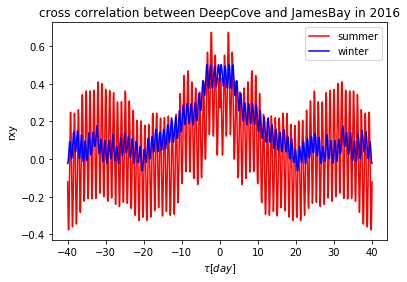

In [24]:
md=40
xx1=yi[0][st:en]
xx2=yi[3][st:en]

xx3=yi[0][st1:en1]
xx4=yi[3][st1:en1]

lagm=daymin*md
lags = range(-lagm,lagm)
cx1x2=0.*np.array(lags)
cx3x4=0.*np.array(lags)

x1=xx1-mean(xx1)
x2=xx2-mean(xx2)

x3=xx3-mean(xx3)
x4=xx4-mean(xx4)

for ind,tau in enumerate(lags):
    if tau<0:
        cx1x2[ind]=np.mean(x1[:tau]*(xx2[-tau:]-mean(xx2[-tau:])))
        cx3x4[ind]=np.mean(x3[:tau]*(xx4[-tau:]-mean(xx4[-tau:])))

    elif tau==0:
        cx1x2[ind]=np.mean(x1*x2)
        cx3x4[ind]=np.mean(x3*x4)
        
    else:
        cx1x2[ind]=np.mean(x1[:-tau]*(xx2[tau:]-mean(xx2[tau:])))
        cx3x4[ind]=np.mean(x3[:-tau]*(xx4[tau:]-mean(xx4[tau:])))
        
td=linspace(-md,md,len(lags))
figure(1)
plot(td,cx1x2/(std(xx1)*std(xx2)),label='summer',color="red")
plot(td,cx3x4/(std(xx3)*std(xx4)),'r',label='winter',color="blue")

xlabel(r'$\tau [day]$')
ylabel('rxy')
title('cross correlation between %s and %s in 2016'%(Name[0],Name[3]))
legend(loc='best')

In [27]:
for i in range(len(arr)):
    ftt=fit[i]
    t=linspace(1,len(ftt)/daymin,len(ftt))

Text(0.5, 1.0, 'The lag correlation of DeepCove in 2016 winter')

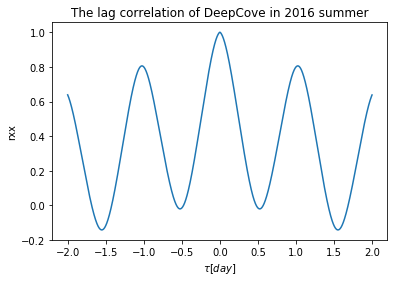

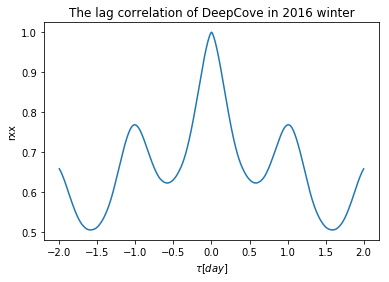

In [28]:
md=2
data=yi[0][st:en]
data1=yi[0][st1:en1]
xx1=data
xx2=data1
lagm=daymin*md
lags = range(-lagm,lagm)
cxx1=0.*np.array(lags)
cxx2=0.*np.array(lags)

x1=xx1-mean(xx1)
x2=xx2-mean(xx2)
     
for ind,tau in enumerate(lags):
    if tau<0:
        cxx1[ind]=np.mean(x1[:tau]*(xx1[-tau:]-mean(xx1[-tau:])))
        cxx2[ind]=np.mean(x2[:tau]*(xx2[-tau:]-mean(xx2[-tau:])))

    elif tau==0:
        cxx1[ind]=np.mean(x1*x1)
        cxx2[ind]=np.mean(x2*x2)
 
    else:
        cxx1[ind]=np.mean(x1[:-tau]*(xx1[tau:]-mean(xx1[tau:])))
        cxx2[ind]=np.mean(x2[:-tau]*(xx2[tau:]-mean(xx2[tau:])))
td=linspace(-md,md,len(lags))
figure(1)
plot(td,cxx1/var(xx1))
xlabel(r'$\tau [day]$')
ylabel('rxx')
title('The lag correlation of %s in 2016 summer'%(Name[0]))
figure(2)
plot(td,cxx2/var(xx2))
xlabel(r'$\tau [day]$')
ylabel('rxx')
title('The lag correlation of %s in 2016 winter'%(Name[0]))

Text(0.5, 1.0, 'The lag correlation of DeepCove in 2016(diurnal)')

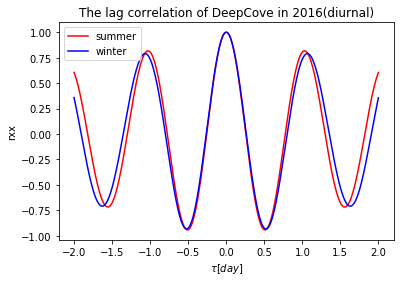

In [29]:
md=2
data=fit[0]
data1=fit1[0]
xx1=data
xx2=data1
lagm=daymin*md
lags = range(-lagm,lagm)
cxx1=0.*np.array(lags)
cxx2=0.*np.array(lags)

x1=xx1-mean(xx1)
x2=xx2-mean(xx2)
     
for ind,tau in enumerate(lags):
    if tau<0:
        cxx1[ind]=np.mean(x1[:tau]*(xx1[-tau:]-mean(xx1[-tau:])))
        cxx2[ind]=np.mean(x2[:tau]*(xx2[-tau:]-mean(xx2[-tau:])))

    elif tau==0:
        cxx1[ind]=np.mean(x1*x1)
        cxx2[ind]=np.mean(x2*x2)
 
    else:
        cxx1[ind]=np.mean(x1[:-tau]*(xx1[tau:]-mean(xx1[tau:])))
        cxx2[ind]=np.mean(x2[:-tau]*(xx2[tau:]-mean(xx2[tau:])))
td=linspace(-md,md,len(lags))
plot(td,cxx1/var(xx1),label='summer',color="red")
plot(td,cxx2/var(xx2),label='winter',color="blue")
xlabel(r'$\tau [day]$')
ylabel('rxx')
legend(loc='best')
title('The lag correlation of %s in 2016(diurnal)'%(Name[0]))

In [30]:
# Deep Cove 236.5430 48.6804 0
# Helgesen 236.446 48.364   2
# JohnMuir 236.250 48.371   6
# DiscoveryElementary 236.349 48.652  1
# JamesBay 236.620 48.417  3

In [31]:
coast=genfromtxt("coast.txt")  
arra=genfromtxt("AllStations_temperature_h.txt")

In [32]:
n=len(arra[0,0:])
for i in range(n):
    if arra[0,i]==236.446 and arra[1,i]==48.364: #2
        m=i
        print (m)
    else:
        pass
data1=arra[2:,m]

for i in range(n):
    if arra[0,i]==236.250 and arra[1,i]==48.371 :  #6
        m1=i
        print (m1)
    else:
        pass
data2=arra[2:,m1]

14
15


In [33]:
tt_start=arra[2,0]
day1start=date.toordinal(date(2017,6,1))+366 
day2start=date.toordinal(date(2017,9,1))+366
day3start=date.toordinal(date(2016,12,1))+366
day4start=date.toordinal(date(2017,3,1))+366

In [34]:
sth=int(2+(day1start-tt_start)*dayhr)  
enh=int(2+(day2start-tt_start)*dayhr) 
sth1=int(2+(day3start-tt_start)*dayhr)  
enh1=int(2+(day4start-tt_start)*dayhr) 

In [35]:
data1s=data1[sth:enh]
data1sn=data1s[~numpy.isnan(data1s)]
tt=linspace(1,len(data1s)/24.0,len(data1sn))
f=interp1d(tt,data1sn,kind='linear')
t=linspace(1,1.0*len(data1s)/dayhr,len(data1s))
data1s=f(t)

data1w=data1[sth1:enh1]
data1wn=data1w[~numpy.isnan(data1w)]
tt=linspace(1,len(data1w)/24.0,len(data1wn))
f=interp1d(tt,data1wn,kind='linear')
t=linspace(1,1.0*len(data1w)/dayhr,len(data1w))
data1w=f(t)

data2s=data2[sth:enh]
data2sn=data2s[~numpy.isnan(data2s)]
tt=linspace(1,len(data2s)/24.0,len(data2sn))
f=interp1d(tt,data2sn,kind='linear')
t=linspace(1,1.0*len(data2s)/dayhr,len(data2s))
data2s=f(t)

data2w=data2[sth1:enh1]
data2wn=data2w[~numpy.isnan(data2w)]
tt=linspace(1,len(data2w)/24.0,len(data2wn))
f=interp1d(tt,data2wn,kind='linear')
t=linspace(1,1.0*len(data2w)/dayhr,len(data2w))
data2w=f(t)

xs1=linspace(1,1.0*len(data1s)/dayhr,len(data1s))
xs2=linspace(1,1.0*len(data2s)/dayhr,len(data2s))

xw1=linspace(1,1.0*len(data1w)/dayhr,len(data1w))
xw2=linspace(1,1.0*len(data2w)/dayhr,len(data2w))


Text(0.5, 1.0, 'The lag auto correlation of Helgesen in 2017')

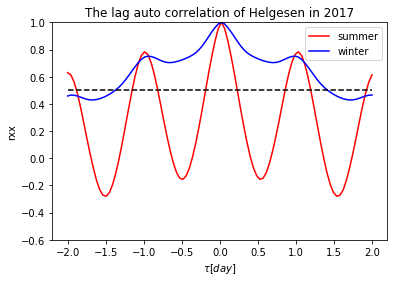

In [36]:
md=2
xx1=data2s
xx2=data2w
lagm=dayhr*md
lags = range(-lagm,lagm)
cxx1=0.*np.array(lags)
cxx2=0.*np.array(lags)

x1=xx1-mean(xx1)
x2=xx2-mean(xx2)
     
for ind,tau in enumerate(lags):
    if tau<0:
        cxx1[ind]=np.mean(x1[:tau]*(xx1[-tau:]-mean(xx1[-tau:])))
        cxx2[ind]=np.mean(x2[:tau]*(xx2[-tau:]-mean(xx2[-tau:])))

    elif tau==0:
        cxx1[ind]=np.mean(x1*x1)
        cxx2[ind]=np.mean(x2*x2)
 
    else:
        cxx1[ind]=np.mean(x1[:-tau]*(xx1[tau:]-mean(xx1[tau:])))
        cxx2[ind]=np.mean(x2[:-tau]*(xx2[tau:]-mean(xx2[tau:])))
td=linspace(-md,md,len(lags))
ly=[]
for i in range(len(td)):
    ly.append(0.5)
ly=array(ly)
plot(td,cxx1/var(xx1),label='summer',color="red")
plot(td,cxx2/var(xx2),label='winter',color="blue")
plot(td,ly,'k--')
xlabel(r'$\tau [day]$')
ylabel('rxx')
ylim(-0.6,1)
legend(loc='best')
title('The lag auto correlation of %s in 2017'%(Name[2]))

In [37]:
xs=arra[0,1:]
ys=arra[1,1:]
xs=array(xs)
ys=array(ys)
xm = array([236.543, 236.349, 236.446, 236.620, 236.597, 236.691, 236.250])
ym = array([48.6804, 48.652, 48.364, 48.417, 48.5677, 48.4623, 48.371])
xx=coast[:,0]+360
yy=coast[:,1]
#Discovery Elementary
#Jamesbay
m=[]
for i in range(len(xm)):
    for j in range(len(xs)):
        if xm[i]==xs[j] and ym[i]==ys[j]:
            m.append(i)
            print (j)
        else:
            pass
m=array(m)
print (m)
ms=array([1,3])
xsm=[]
ysm=[]
for i in range(len(ms)):
    xsm.append(xm[ms[i]])
    ysm.append(ym[ms[i]])
xsm=array(xsm)
ysm=array(ysm)
xsb=[]
ysb=[]
for i in range(len(m)):
    xsb.append(xm[m[i]])
    ysb.append(ym[m[i]])
xsb=array(xsb)
ysb=array(ysb)
lon=cos(mean(yy/180*pi))
print ('start:',date.fromordinal(int(arra[2,0])-366))
print ('end:',date.fromordinal(int(arra[len(arra[:,0])-1,0])-366))

7
13
16
32
14
[0 2 4 5 6]
start: 2008-01-01
end: 2017-08-31


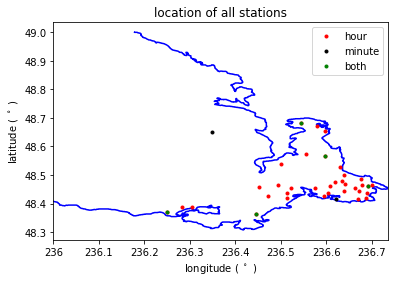

In [39]:
figure(1)
plot(xx,yy,'b-')
plot(xs,ys,'r.',label='hour')
plot(xsm,ysm,'k.',label='minute')
plot(xsb,ysb,'g.',label='both')
locs,labels = xticks()
xticks(locs, map(lambda x: "%g" % x, locs))
xlabel('longitude ( $^\circ$ )')
ylabel('latitude ( $^\circ$ )')
xlim(min(xx),max(xx))
title('location of all stations')
legend(loc='best')

In [40]:
from scipy.interpolate import griddata

In [41]:
tt_startm = arr[0][0] -(7.0/24)
tt_start=arra[2,0]
day1start=date.toordinal(date(2012,12,1))+366 
day2start=date.toordinal(date(2013,3,1))+366
st=int(3+(day1start-tt_startm)*daymin)  
en=int(3+(day2start-tt_startm)*daymin) 
sth=int(2+(day1start-tt_start)*dayhr)  
enh=int(2+(day2start-tt_start)*dayhr) 

In [42]:
mht=[]
for i in range(len(xs)):
    data=arra[2:,i+1][sth:enh]
    data1=data[~numpy.isnan(data)]
    tt=linspace(1,len(data)/24.0,len(data1))
    f=interp1d(tt,data1,kind='linear')
    t=linspace(1,1.0*len(data)/dayhr,len(data))
    data=f(t)
    mht.append(mean(data))

In [43]:
xst=[]
yst=[]
for i in range(len(xs)):
    xst.append(xs[i])
    yst.append(ys[i])
for i in range(len(xsm)):
    xst.append(xsm[i])
    yst.append(ysm[i])
    mht.append(mean(yi[ms[i]][st:en]))
xst=array(xst)
yst=array(yst)
mht=array(mht)

In [44]:
print (len(mht))

37


In [45]:
Xi=236.2
Xm=236.8
Yi=48.30
Ym=48.80
X=linspace(Xi,Xm,len(xx))
Y=linspace(Yi,Ym,len(yy))
X, Y = meshgrid(X, Y)
X_sub=xst
Y_sub=yst
Z_sub=mht
rcParams.update({'font.size': 10, 'text.usetex': True})

In [46]:
point= zeros((len(X_sub), 2))
for i in range(len(X_sub)):
    point[i,0]=X_sub[i]
    point[i,1]=Y_sub[i]
Z_lin  =griddata(point,Z_sub,(X,Y),method='cubic')

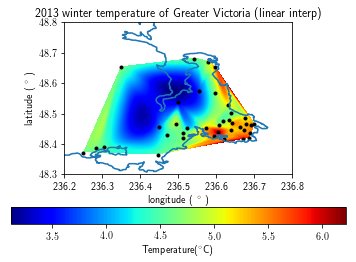

In [47]:
imshow(Z_lin,extent=[Xi,Xm,Ym,Yi],cmap='jet',aspect=0.8)
plot(X_sub,Y_sub,'k.')
xlabel('longitude ( $^\circ$ )')
ylabel('latitude ( $^\circ$ )')
plot(xx,yy)
title('2013 winter temperature of Greater Victoria (linear interp)')
cb=colorbar(orientation='horizontal')
cb.set_label('Temperature($^\circ$C) %')
locs,labels = xticks()
xticks(locs, map(lambda x: "%g" % x, locs))
xlim(236.2,236.8)
ylim(48.30,48.80)
show()

In [48]:
lr=[]
xsr=[]
for i in range(len(xs)):
    data=arra[2:,i+1]
    data1=data[~numpy.isnan(data)]
    lr.append((1-1.0*len(data1)/len(data))*100)
    xsr.append(i+1)
lr=array(lr)
xsr=array(xsr)

Text(0.5, 1.0, 'percentage of nans for each station')

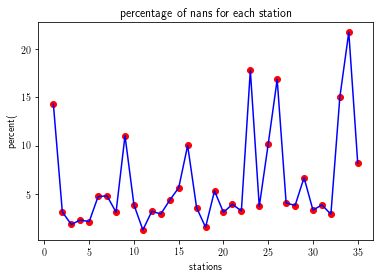

In [49]:
plot(xsr,lr,'ro')
plot(xsr,lr,'b-')
xlabel('stations')
ylabel('percent(%)')
title('percentage of nans for each station')

In [52]:
for i in range (len(lr)):
    if lr[i]>=20:
        print (i)
    else:
        pass
print (lr[33])

33
21.765559896601783
